In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

<ipython-input-2-71212c29c9c9>:2: RuntimeWarning: divide by zero encountered in log2
  s = -p*np.log2(p)-(1-p)*np.log2(1-p)
<ipython-input-2-71212c29c9c9>:2: RuntimeWarning: invalid value encountered in multiply
  s = -p*np.log2(p)-(1-p)*np.log2(1-p)


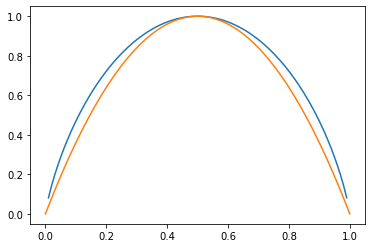

In [2]:
p = np.linspace(0,1,100)
s = -p*np.log2(p)-(1-p)*np.log2(1-p)
g = 1-p**2 - (1-p)**2
plt.plot(p,s)
plt.plot(p,g*2)

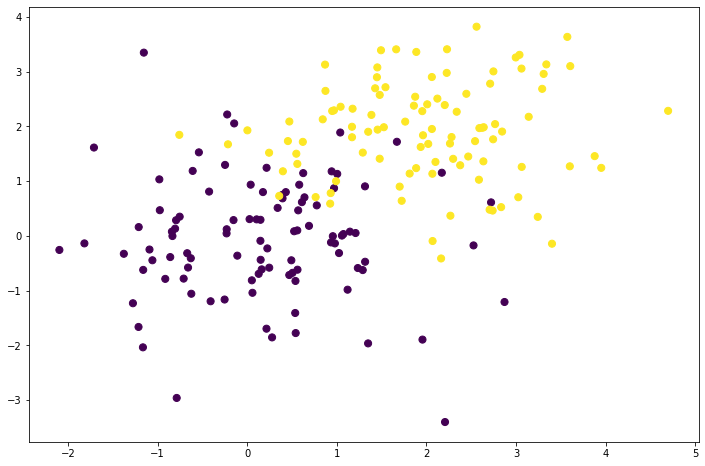

In [3]:
np.random.seed(17)
#rnd = np.random.RandomState(17)
x1 = np.random.normal(size=(100,2))#第1的類別100比每一筆2D陣列
x2 = np.random.normal(loc=2, size=(100,2))#第2的類別loc是往盤邊一 
x = np.vstack((x1,x2))#上下合併x1 x2
y1 = np.zeros((100,1))#生成100筆全為0的2D陣列
y2 = np.ones((100,1))#生成100筆全為1的2D陣列
y = np.vstack((y1,y2))#上下合併y1 y2
plt.figure(figsize=(12,8))#把圖變12*8 dpi
plt.scatter(x[:,0],x[:,1],c=y,s=50)#x[:,0]是指x1,x[:,1]是指x2,c=y,s=50點的大小




<ipython-input-4-7791e3210403>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,yhat)


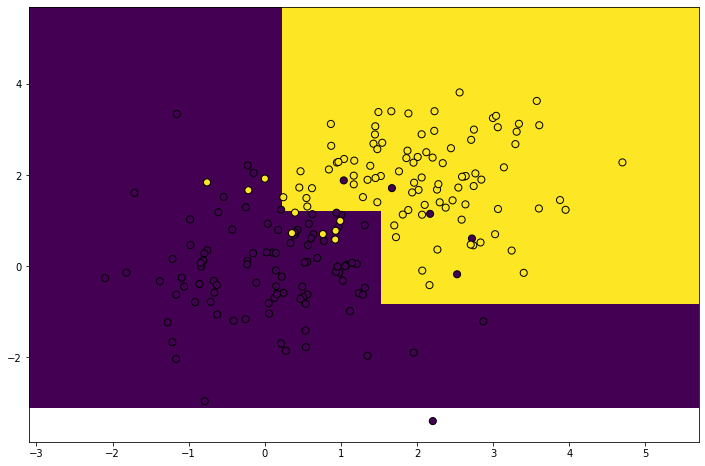

In [4]:
from sklearn.tree import DecisionTreeClassifier#決策樹
tree= DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)#criterion=判斷 max_depth=深度 random_state=產生亂數
tree.fit(x,y)#判斷x,y

xmin, xmax = x[:,0].min()-1, x[:,0].max()+1#x的範圍
ymin, ymax = x[:,0].min()-1, x[:,0].max()+1#y的範圍
xx ,yy =np.meshgrid(np.linspace(xmin,xmax,1000), np.linspace(ymin,ymax,1000))#
yhat = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)#
plt.figure(figsize=(12,8))
plt.pcolormesh(xx,yy,yhat)
plt.scatter(x[:,0],x[:,1],c=y ,s=50,edgecolors='k')



顯示思考邏輯

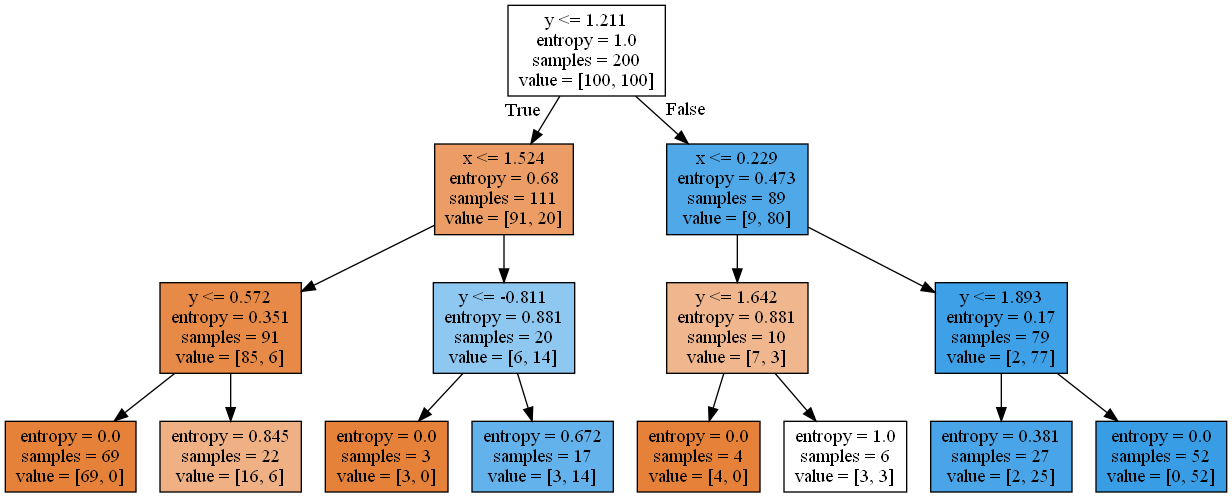

In [5]:
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

dotData = StringIO()
export_graphviz(tree, feature_names=['x','y'],out_file=dotData, filled=True)
img = pydotplus.graph_from_dot_data(dotData.getvalue())

#from ipywidgets import Image
#Image(value=img.create_png())

from IPython.display import Image
Image(img.create_png())



In [6]:
rnd = np.random.RandomState(17)#產生亂數表rnd
Data = np.r_[rnd.normal(size=(1000,2)), rnd.normal(loc=2, size=(1000,2))]# 產生測試用數值
labels = np.r_[np.zeros(1000),np.ones(1000)]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Data, labels, test_size=0.3)#將上述產生資料拆分成訓練及測試二組。

tree = DecisionTreeClassifier(max_depth=5, random_state=17)#設定模式訓練規則
tree.fit(x_train,y_train) #帶入訓練資料

y_hat = tree.predict(x_test)#帶入測試資料做驗算，用x_test作出來的Y值(y_hat)和(y_test)比對

from sklearn.metrics import accuracy_score
print(f"accuracy of decision tree width max_depth=5 is {accuracy_score(y_test,y_hat)}")#印出結果 



accuracy of decision tree width max_depth=5 is 0.9233333333333333


In [7]:
#Grid SearchCV（網格搜索法）
from sklearn.model_selection import GridSearchCV

tree_params={'max_depth':range(3,21,1)} #用字典方式，設定max_depth的參數，由3次到21次，每次加1。
tree_grid = GridSearchCV(tree, param_grid=tree_params, cv=5 ,n_jobs=-1)
#設定tree_grid模式測試參數，cv:把資料分成5份，4份作訓練、1份作比對，n_jos=-1設定多核CUP運作方式，-1表依機器設定

tree_grid.fit(x_train,y_train) #帶入訓練資料
print(f'Best Params is{tree_grid.best_params_}') #印出測試後的到最佳參數
print(f'Best Score is{tree_grid.best_score_}') #印出測試後的到最佳分數
print(f'accuracy of tree_grid is {accuracy_score(y_test,tree_grid.predict(x_test))}')


Best Params is{'max_depth': 4}
Best Score is0.8942857142857144
accuracy of tree_grid is 0.93


In [10]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(f"Accuacy of Training Set is{accuracy_score(y_train,knn.predict(x_train))}")
print(f"Accuacy of Tesing Set is{accuracy_score(y_test,y_pred)}")

Accuacy of Training Set is0.925
Accuacy of Tesing Set is0.925
